#Linear Regression using the Diamonds Dataset from the Seaborn Library

# Linear Regression: Simplified Overview

Linear regression is a method used to predict a continuous outcome (dependent variable) based on one or more input features (independent variables). It works by finding the best-fit straight line that minimizes the error between predicted and actual values.

For example, to predict house prices, factors like house age, location, area, and number of rooms can be used. Linear regression assumes a linear relationship between these features and the price.

### Why is Linear Regression Important?
- **Interpretability**: The model provides coefficients that clearly show the impact of each feature on the outcome.
- **Simplicity**: It is easy to implement and serves as a foundation for more advanced algorithms.
- **Transparency**: The straightforward nature of the model makes it ideal for understanding relationships in data.

### What is the Best-Fit Line?
The best-fit line minimizes the error between predicted and actual values. It represents the relationship between the dependent and independent variables, with the slope indicating how much the outcome changes for a unit change in a feature.

### Difference Between Linear Regression and Other Regressions
- **Linear Regression**: Predicts continuous outcomes (e.g., house prices) and assumes a linear relationship between variables.
- **Logistic Regression**: Used for classification tasks (e.g., spam detection) and predicts probabilities for categorical outcomes.

In [2]:
! pip install -q pandas matplotlib seaborn scikit-learn numpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
diamonds = sns.load_dataset('diamonds')

In [5]:
print(diamonds.head())
# print(diamonds.shape)
# print(diamonds.describe())
# print(diamonds.info())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [6]:
features = ['carat','depth','table','x','y','z']
X = diamonds[features]
y = diamonds['price']

In [7]:
clarity_dummies = pd.get_dummies(diamonds['clarity'], prefix = 'clarity')
print(clarity_dummies.head())
X = pd.concat([X, clarity_dummies], axis =1)

   clarity_IF  clarity_VVS1  clarity_VVS2  clarity_VS1  clarity_VS2  \
0       False         False         False        False        False   
1       False         False         False        False        False   
2       False         False         False         True        False   
3       False         False         False        False         True   
4       False         False         False        False        False   

   clarity_SI1  clarity_SI2  clarity_I1  
0        False         True       False  
1         True        False       False  
2        False        False       False  
3        False        False       False  
4        False         True       False  


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# # print(X_train)
# # print(X_test)
# print(y_train)
# print(y_test)

# Instead of just printing y_train and y_test, let's create DataFrames:
train_data = pd.DataFrame({'Training Prices': y_train})
test_data = pd.DataFrame({'Testing Prices': y_test})

# Display the first few rows of each DataFrame
print("First few training prices:")
print(train_data.head())

print("\nFirst few testing prices:")
print(test_data.head())

# If you want to see all the data, you can uncomment these lines:
# print("\nAll training prices:")
# print(train_data)

# print("\nAll testing prices:")
# print(test_data)

First few training prices:
       Training Prices
26546            16231
9159              4540
14131             5729
15757             6300
24632            12968

First few testing prices:
       Testing Prices
1388              559
50052            2201
41645            1238
42377            1304
17244            6901


In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train , y_train)

LinearRegression()

In [14]:
# y_pred = model.predict(X_test)
# print(f"Predicted Prices: {y_pred}")
# print(f"Actual Prices: {y_test}")
# print(y_pred)
# print()
# print(y_test)

y_pred = model.predict(X_test)  # Predict prices using the trained model

# Create a DataFrame for better visualization
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

# Print the first few rows of the results
print("First few predictions:")
print(results.head())

# Print the entire DataFrame of results
print("\nAll predictions:")
print(results)

First few predictions:
       Actual Prices  Predicted Prices
1388             559        640.475511
50052           2201       3122.407626
41645           1238       1691.309439
42377           1304       1907.896663
17244           6901       9216.141381

All predictions:
       Actual Prices  Predicted Prices
1388             559        640.475511
50052           2201       3122.407626
41645           1238       1691.309439
42377           1304       1907.896663
17244           6901       9216.141381
...              ...               ...
44081           1554       1813.297399
23713            633        692.341265
31375            761       1130.106610
21772           9836       8087.628395
4998            3742       4843.095347

[10788 rows x 2 columns]


In [15]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1613865.1555372945
R-squared: 0.8984787518381911


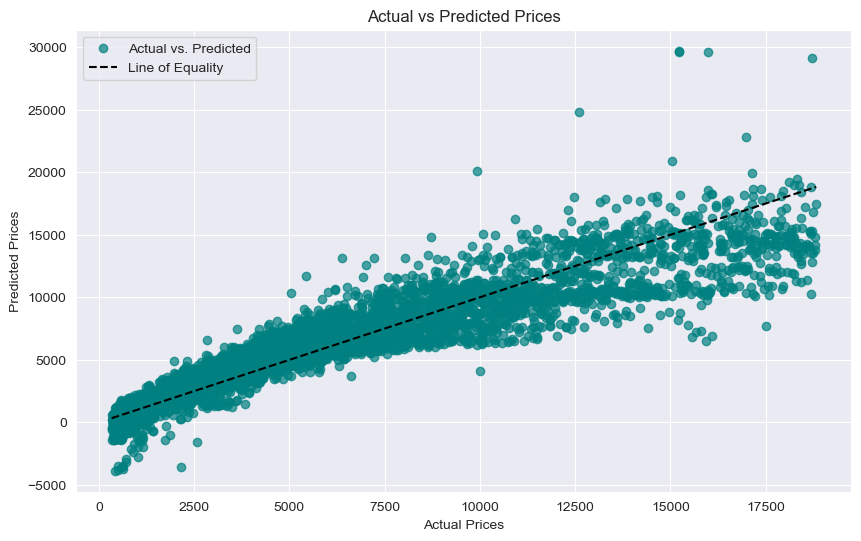

In [16]:
# plt.figure(figsize=(10, 6)) #size is width x height in inches = 10 inches x 6 inches
# plt.scatter(y_test, y_pred, color='#FA1388', alpha=0.5)
#  #Argument-1: the values that will be plotted on the x-axis, Arg-2: the values that will be plotted on the y-axis,  #Arg-3: the color of the points in the scatter plot; It can be specified other colors using named colors (like 'blue', 'red', etc.), hex color   #Arg-4: controls the transparency; value ranges from 0 (completely transparent) to 1 (completely opaque).
# # Plot the line of equality
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='blue')
#  #Arg-1: X axis coordinate, Arg-2: Y axis coordinate, Arg-3: Line style & color (k=black), Arg-4: color override
# plt.xlabel('Actual Prices')
# plt.ylabel('Predicted Prices')
# plt.title('Actual vs Predicted Prices')
# plt.grid(True)
# plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))  # Set figure size (width, height) in inches

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, color='teal', alpha=0.7, label='Actual vs. Predicted')
# 'teal' for a different color, alpha for transparency, label for legend

# Line of equality (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         linestyle='--', color='black', label='Line of Equality')
# linestyle for dashed line, color changed to black, label for legend

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)  # Add a grid for better visualization
plt.legend()   # Display the legend
plt.show()